In [ ]:
# Run this cell!
import numpy as np # Importing every numpy class/function under the nickname "np"
import pandas as pd # Importing every pandas class/function under the nickname "pd"
import matplotlib.pyplot as plt # Importing the pyplot class from matplotlib, nicknamed plt
import seaborn as sns
import scipy.io
from scipy import stats as st
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


legendFont = {'family':'sans-serif','size':16,'weight':'bold'}
labelFont = {'family':'sans-serif','color':'black','size':18}

In [ ]:
# get the data
n_mTBI = 12
n_contr = 25

mTBI_impulsivity_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'AG',nrows = n_mTBI, header = 1)
contr_impulsivity_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'AG',skiprows = 21, nrows = n_contr, header = 1)

mTBI_impul = mTBI_impulsivity_df.values
control_impul = contr_impulsivity_df.values
control_impul
# mTBI_impul

array([[16],
       [21],
       [21],
       [16],
       [14],
       [18],
       [10],
       [15],
       [17],
       [14],
       [12],
       [13],
       [17],
       [21],
       [17],
       [14],
       [18],
       [17],
       [14],
       [22],
       [13],
       [16],
       [20],
       [12],
       [19]])

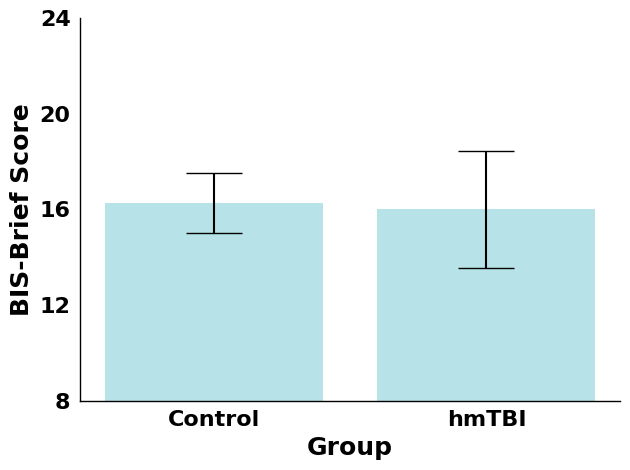

In [ ]:
# bar plot for impulsivity (mtBI vs. control)

# Data
categories = ['Control', 'hmTBI']


# Calculate means and confidence intervals
control_mean = np.mean(control_impul)
mTBI_mean = np.mean(mTBI_impul)


# CIs copied from the excel sheet
mTB_CI = 2.44
contr_CI = 1.26

# Create the bar plot
ax = plt.subplot()
bar_width = 0.4  # Bar width adjusted
bar_positions1 = [0]
bar_positions2 = [0.5]

# make sure to edit how CI is calculated here
bars1 = ax.bar(bar_positions1, control_mean, bar_width, color='powderblue', yerr= contr_CI, capsize=20, label='Control',alpha=0.9)
bars2 = ax.bar(bar_positions2, mTBI_mean, bar_width, color='powderblue', yerr= mTB_CI, capsize=20, label='mTBI',alpha=0.9)

ax.set_xticks([0, 0.5])
ax.set_xticklabels(categories)

plt.xlabel('Group', fontdict=labelFont, fontweight='bold')
plt.ylabel('BIS-Brief Score', fontdict=labelFont, fontweight='bold')
plt.ylim(8,24)
plt.yticks(np.arange(8, 25, 4))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data points for series 1 as gray dots with jitter
# for i, v in enumerate(control_impul):
#     jitter = np.random.normal(0, 0.02, size=1)[0]  # jitter
#     ax.plot(bar_positions1[0] + jitter, v, 'o', color='dimgray', alpha=0.5)

# # Add data points for series 2 as gray dots with jitter
# for i, v in enumerate(mTBI_impul):
#     jitter = np.random.normal(0, 0.02, size=1)[0]  # jitter
#     ax.plot(bar_positions2[0] + jitter, v, 'o', color='dimgray', alpha=0.5)

plt.tick_params(axis='y', left=False, labelsize=16)
plt.tick_params(axis='x', bottom=False, labelsize=16)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("bis_brief.png", format="png", dpi=600)
plt.show()


In [ ]:
# get the data - recognition acc
n_mTBI = 12
n_contr = 25

mTBI_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'D',nrows = n_mTBI, header = 1)
mTBI_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'O',nrows = n_mTBI, header = 1)
contr_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'D',skiprows = 21, nrows = n_contr, header = 1)
contr_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'O',skiprows = 21, nrows = n_contr, header = 1)

mTBI_block = mTBI_block_df.values
mTBI_mix = mTBI_mix_df.values
contr_block = contr_block_df.values
contr_mix = contr_mix_df.values

contr_block

array([[0.84   ],
       [0.7    ],
       [0.76   ],
       [0.87   ],
       [0.74   ],
       [0.72449],
       [0.80808],
       [0.77   ],
       [0.78   ],
       [0.72973],
       [0.73469],
       [0.92   ],
       [0.80612],
       [0.77778],
       [0.84848],
       [0.78788],
       [0.89899],
       [0.79   ],
       [0.69697],
       [0.9    ],
       [0.73737],
       [0.84   ],
       [0.78   ],
       [0.82   ],
       [0.7732 ]])

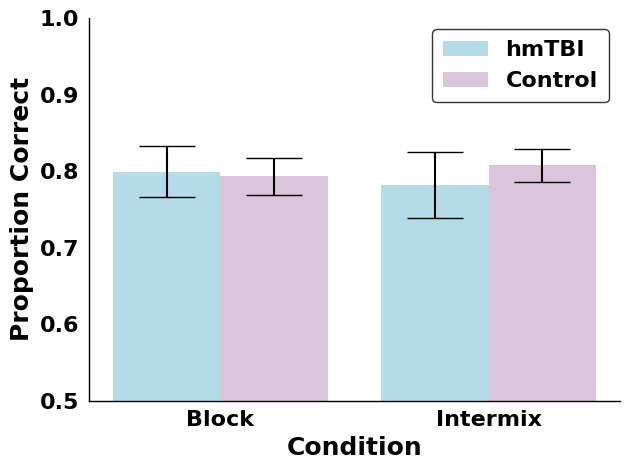

In [ ]:
# bar plot for recognition accuracy (mTBI vs. control; blocked vs. intermixed)

# Data
categories = ['Block', 'Intermix']
X_axis = np.arange(len(categories))

# Calculate means and confidence intervals
mTBI_block_mean = np.mean(mTBI_block)
mTBI_mix_mean = np.mean(mTBI_mix)
contr_block_mean = np.mean(contr_block)
contr_mix_mean = np.mean(contr_mix)

contr = [contr_block_mean, contr_mix_mean]
mTBI = [mTBI_block_mean, mTBI_mix_mean]

# CIs copied from the excel sheet
mTBI_block_CI = 0.033
contr_block_CI = 0.024
mTBI_mix_CI = 0.043
contr_mix_CI = 0.022

# Create the bar plot
ax = plt.subplot()
bar_width = 0.4  # Bar width adjusted

# make sure to edit how CI is calculated here
bars2 = ax.bar(X_axis - 0.2, [mTBI_block_mean, mTBI_mix_mean], bar_width, color='lightblue', yerr=[mTBI_block_CI, mTBI_mix_CI], capsize=20, label='hmTBI',alpha=0.9)
bars1 = ax.bar(X_axis + 0.2, [contr_block_mean, contr_mix_mean], bar_width, color='thistle', yerr=[contr_block_CI, contr_mix_CI], capsize=20, label='Control',alpha=0.9)

ax.set_xticks(X_axis, categories)

plt.xlabel('Condition', fontdict=labelFont, fontweight='bold')
plt.ylabel('Proportion Correct', fontdict=labelFont, fontweight='bold')
plt.ylim(.5,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(axis='y', left=False, labelsize=16)
plt.tick_params(axis='x', bottom=False, labelsize=16)

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("recog_acc_blocktype_group.png", format="png", dpi=600)
plt.show()

In [ ]:
# get the data - recognition rt
n_mTBI = 12
n_contr = 25

mTBI_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'G',nrows = n_mTBI, header = 1)
mTBI_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'R',nrows = n_mTBI, header = 1)
contr_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'G',skiprows = 21, nrows = n_contr, header = 1)
contr_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'R',skiprows = 21, nrows = n_contr, header = 1)

mTBI_block = mTBI_block_df.values
mTBI_mix = mTBI_mix_df.values
contr_block = contr_block_df.values
contr_mix = contr_mix_df.values

contr_block

array([[1.0146 ],
       [0.77298],
       [0.69015],
       [0.61302],
       [0.6859 ],
       [1.0972 ],
       [0.90324],
       [0.5272 ],
       [0.70938],
       [0.85807],
       [0.89978],
       [0.7935 ],
       [1.0937 ],
       [0.82723],
       [0.62106],
       [0.65318],
       [1.1657 ],
       [0.8474 ],
       [0.91612],
       [0.58024],
       [0.66266],
       [0.87586],
       [0.65664],
       [0.74532],
       [1.0338 ]])

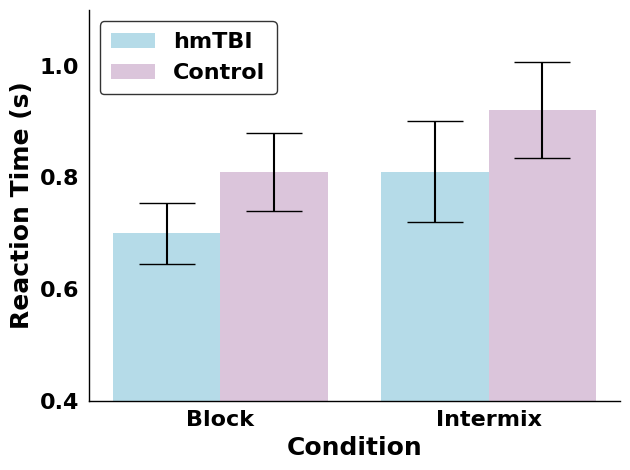

In [ ]:
# bar plot for recognition rt (mTBI vs. control; blocked vs. intermixed)

# Data
categories = ['Block', 'Intermix']
X_axis = np.arange(len(categories))

# Calculate means and confidence intervals
mTBI_block_mean = np.mean(mTBI_block)
mTBI_mix_mean = np.mean(mTBI_mix)
contr_block_mean = np.mean(contr_block)
contr_mix_mean = np.mean(contr_mix)

contr = [contr_block_mean, contr_mix_mean]
mTBI = [mTBI_block_mean, mTBI_mix_mean]

# CIs copied from the excel sheet
mTBI_block_CI = 0.054
contr_block_CI = 0.069
mTBI_mix_CI = 0.090
contr_mix_CI = 0.086

# Create the bar plot
ax = plt.subplot()
bar_width = 0.4  # Bar width adjusted

# make sure to edit how CI is calculated here
bars2 = ax.bar(X_axis - 0.2, [mTBI_block_mean, mTBI_mix_mean], bar_width, color='lightblue', yerr=[mTBI_block_CI, mTBI_mix_CI], capsize=20, label='hmTBI',alpha=0.9)
bars1 = ax.bar(X_axis + 0.2, [contr_block_mean, contr_mix_mean], bar_width, color='thistle', yerr=[contr_block_CI, contr_mix_CI], capsize=20, label='Control',alpha=0.9)

ax.set_xticks(X_axis, categories)

plt.xlabel('Condition', fontdict=labelFont, fontweight='bold')
plt.ylabel('Reaction Time (s)', fontdict=labelFont, fontweight='bold')
plt.ylim(.4,1.1)

plt.yticks(np.arange(.4, 1.2, .2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(axis='y', left=False, labelsize=16)
plt.tick_params(axis='x', bottom=False, labelsize=16)

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("recog_rt_blocktype_group.png", format="png", dpi=600)
plt.show()

In [ ]:
# get the data - recall
n_mTBI = 12
n_contr = 25

mTBI_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'K',nrows = n_mTBI, header = 1)
mTBI_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'V',nrows = n_mTBI, header = 1)
contr_block_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'K',skiprows = 21, nrows = n_contr, header = 1)
contr_mix_df = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "mTBI vs Control", usecols = 'V',skiprows = 21, nrows = n_contr, header = 1)

mTBI_block = mTBI_block_df.values
mTBI_mix = mTBI_mix_df.values
contr_block = contr_block_df.values
contr_mix = contr_mix_df.values

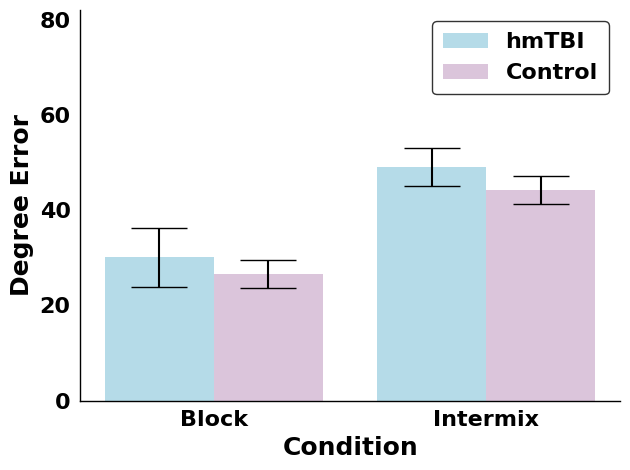

In [ ]:
# bar plot for recall error (mTBI vs. control; blocked vs. intermixed)

# Data
categories = ['Block', 'Intermix']
X_axis = np.arange(len(categories))

# Calculate means and confidence intervals
mTBI_block_mean = np.mean(mTBI_block)
mTBI_mix_mean = np.mean(mTBI_mix)
contr_block_mean = np.mean(contr_block)
contr_mix_mean = np.mean(contr_mix)

contr = [contr_block_mean, contr_mix_mean]
mTBI = [mTBI_block_mean, mTBI_mix_mean]

# CIs copied from the excel sheet
mTBI_block_CI = 6.28;
contr_block_CI = 2.90;
mTBI_mix_CI = 3.97;
contr_mix_CI = 2.86;

# Create the bar plot
ax = plt.subplot()
bar_width = 0.4  # Bar width adjusted

# make sure to edit how CI is calculated here
bars2 = ax.bar(X_axis - 0.2, [mTBI_block_mean, mTBI_mix_mean], bar_width, color='lightblue', yerr=[mTBI_block_CI, mTBI_mix_CI], capsize=20, label='hmTBI',alpha=0.9)
bars1 = ax.bar(X_axis + 0.2, [contr_block_mean, contr_mix_mean], bar_width, color='thistle', yerr=[contr_block_CI, contr_mix_CI], capsize=20, label='Control',alpha=0.9)

ax.set_xticks(X_axis, categories)

plt.xlabel('Condition', fontdict=labelFont, fontweight='bold')
plt.ylabel('Degree Error', fontdict=labelFont, fontweight='bold')
plt.ylim(0,82)

plt.yticks(np.arange(0,82,20))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(axis='y', left=False, labelsize=16)
plt.tick_params(axis='x', bottom=False, labelsize=16)

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("recall_blocktype_group.png", format="png", dpi=600)
plt.show()

In [ ]:
all_n = n_mTBI + n_contr;

allData = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "All Data", nrows=all_n, usecols = 'B:AD')

bis_data = allData['Impulsivity Score'].values
block_acc = allData['Recog Acc (all - intermixed)'].values
mix_acc = allData['Recog Acc (all - block)'].values

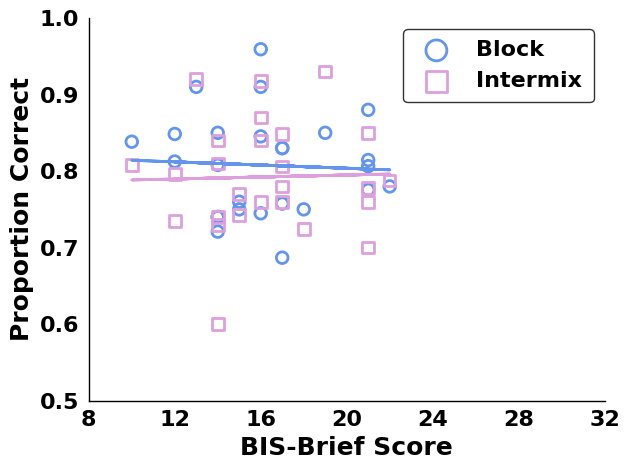

In [ ]:
# bar plot for recognition accuracy (blocked vs. intermixed; impulsivity)

all_n = n_mTBI + n_contr;
allData = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "All Data", nrows=all_n, usecols = 'B:AD')

bis_data = allData['Impulsivity Score'].values
block_acc = allData['Recog Acc (all - intermixed)'].values
mix_acc = allData['Recog Acc (all - block)'].values

plt.scatter(bis_data,block_acc, s=70, facecolors='none', edgecolors='cornflowerblue', label="Block",linewidths=2)
plt.scatter(bis_data,mix_acc, s=70, marker='s',facecolors='none', edgecolors='plum', label = "Intermix",linewidths=2)

plt.xlabel('BIS-Brief Score', fontdict=labelFont,fontweight='bold')
plt.ylabel('Proportion Correct', fontdict=labelFont,fontweight='bold')
plt.xlim(8,32)
plt.xticks(np.arange(8, 33, 4))
plt.ylim(.5,1)

ax = plt.subplot()

z = np.polyfit(bis_data, block_acc, 1)
p = np.poly1d(z)
plt.plot(bis_data,p(bis_data), color = "cornflowerblue",linewidth=2)

z2 = np.polyfit(bis_data, mix_acc, 1)
p2 = np.poly1d(z2)
plt.plot(bis_data,p2(bis_data), color = "plum",linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(bottom = False,labelsize=16)
plt.tick_params(left = False,labelsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("bis_recog_acc.png",format="png",dpi=600)
plt.show()

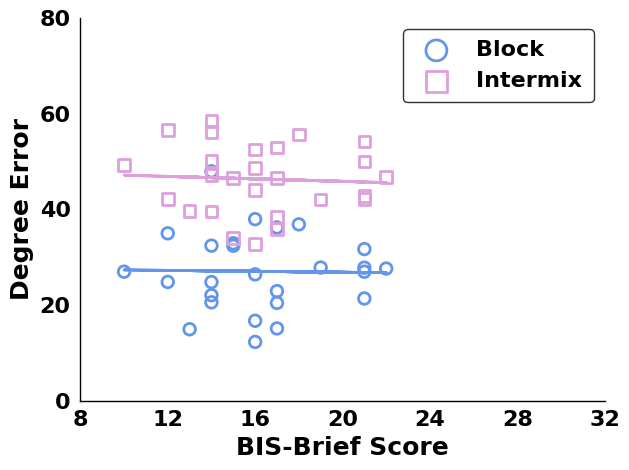

In [ ]:
# bar plot for recog error (blocked vs. intermixed; impulsivity)

all_n = n_mTBI + n_contr;
allData = pd.read_excel("wpd_2024_data.xlsx", sheet_name = "All Data", nrows=all_n, usecols = 'B:AD')

bis_data = allData['Impulsivity Score'].values
block_error = allData['Recall Error - Average (block)'].values
mix_error = allData['Recall Error - Average (intermixed)'].values

plt.scatter(bis_data,block_error, s=70, facecolors='none', edgecolors='cornflowerblue', label="Block",linewidths=2)
plt.scatter(bis_data,mix_error, s=70, marker='s',facecolors='none', edgecolors='plum', label = "Intermix",linewidths=2)

plt.xlabel('BIS-Brief Score', fontdict=labelFont,fontweight='bold')
plt.ylabel('Degree Error', fontdict=labelFont,fontweight='bold')
plt.xlim(8,32)
plt.xticks(np.arange(8, 33, 4))
plt.ylim(0,80)
plt.yticks(np.arange(0, 81, 20))

ax = plt.subplot()

z = np.polyfit(bis_data, block_error, 1)
p = np.poly1d(z)
plt.plot(bis_data,p(bis_data), color = "cornflowerblue",linewidth=2)

z2 = np.polyfit(bis_data, mix_error, 1)
p2 = np.poly1d(z2)
plt.plot(bis_data,p2(bis_data), color = "plum",linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(bottom = False,labelsize=16)
plt.tick_params(left = False,labelsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.tight_layout()
plt.savefig("bis_recall_error.png",format="png",dpi=600)
plt.show()

In [ ]:
data = pd.read_excel("lena_nura_24_wpd_long.xlsx")
data



,SubID,Group,Task,TrialType,Zscore,ImpulsivityScore
0,26,mTBI,Recognition,Intermixed,-0.416043,22
1,26,mTBI,Recall,Intermixed,0.055277,22
2,26,mTBI,Recognition,Blocked,0.164407,22
3,26,mTBI,Recall,Blocked,-0.023847,22
4,34,mTBI,Recognition,Intermixed,0.818168,19
...,...,...,...,...,...,...
99,58,Control,Recall,Blocked,0.963476,17
100,63,mTBI,Recognition,Intermixed,1.011755,21
101,63,mTBI,Recall,Intermixed,0.974105,21
102,63,mTBI,Recognition,Blocked,0.816774,21


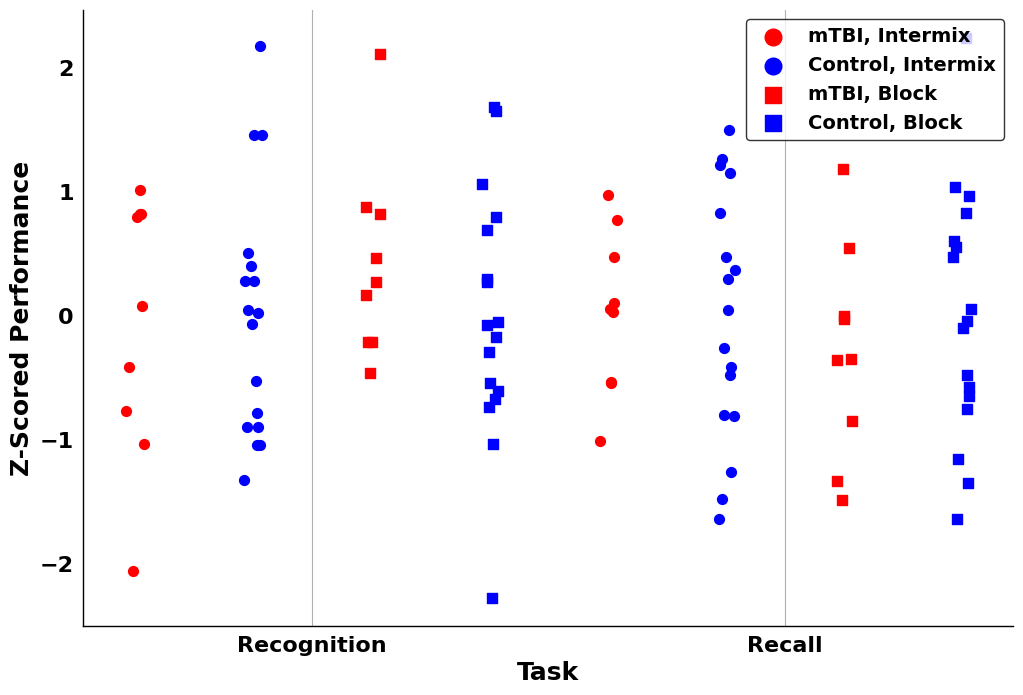

<Figure size 640x480 with 0 Axes>

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Assuming data and necessary libraries are already imported

data = pd.read_excel("lena_nura_24_wpd_long.xlsx")

legendFont = {'family': 'sans-serif', 'size': 14, 'weight': 'bold'}
labelFont = {'family': 'sans-serif', 'color': 'black', 'size': 18}

# Create the strip plot
plt.figure(figsize=(12, 8))

# Define the order of plotting
trial_order = ['Intermixed', 'Blocked']
group_order = ['mTBI', 'Control']
task_order = ['Recognition', 'Recall']

# Define colors and markers
colors = {'mTBI': 'red', 'Control': 'blue'}
markers = {'Intermixed': 'o', 'Blocked': 's'}

# Loop through each combination of Task, TrialType, and Group
for i, task in enumerate(task_order):
    for j, trial_type in enumerate(trial_order):
        for k, group in enumerate(group_order):
            # Filter data for the current combination of Task, TrialType, and Group
            subset_data = data[(data['Task'] == task) &
                               (data['TrialType'] == trial_type) &
                               (data['Group'] == group)]

            # Calculate x coordinate for current strip
            x = (i * len(trial_order) * len(group_order)) + (j * len(group_order)) + k + 1

            # Add jitter to x coordinates
            jitter = np.random.uniform(low=-0.08, high=0.08, size=len(subset_data))
            x_jittered = [x + jitter_val for jitter_val in jitter]

            # Plot the data as a strip
            plt.scatter(x=x_jittered, y=subset_data['Zscore'], color=colors[group],
                        marker=markers[trial_type], s = 50)

# Add title and labels
plt.xlabel('Task', fontdict=labelFont, fontweight='bold')
plt.ylabel('Z-Scored Performance', fontdict=labelFont, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define legend labels and markers
legend_labels = ['mTBI, Intermix', 'Control, Intermix', 'mTBI, Block', 'Control, Block']
legend_markers = ['o', 'o', 's', 's']
legend_colors = ['red', 'blue', 'red', 'blue']

# Plot invisible points to create a custom legend with correct markers
for label, marker, color in zip(legend_labels, legend_markers, legend_colors):
    plt.scatter([], [], color=color, marker=marker, label=label)

# Add legend
legend = plt.legend(prop=legendFont, markerscale=2)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

# Set x-axis ticks and labels
plt.xticks([2.5, 6.5], ['Recognition', 'Recall'])

plt.tick_params(axis='y', left=False, labelsize=16)
plt.tick_params(axis='x', bottom=False, labelsize=16)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Show plot with only horizontal gridlines removed
plt.grid(axis='x')  # Remove horizontal gridlines
# plt.tight_layout()
plt.show()

plt.savefig("z_all.png",format="png",dpi=600)
plt.show()

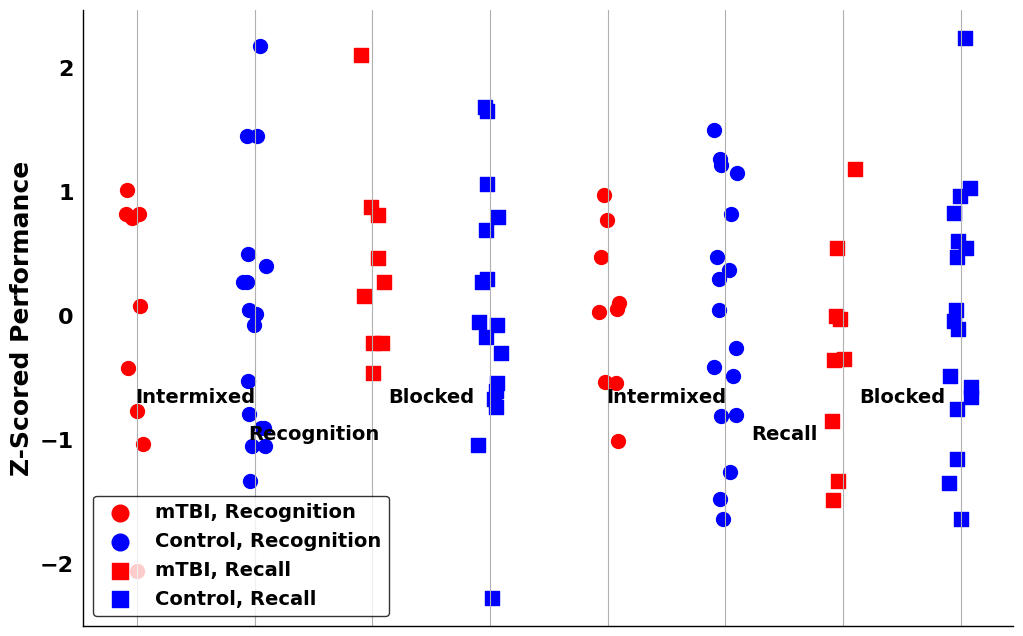

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming data and necessary libraries are already imported

data = pd.read_excel("lena_nura_24_wpd_long.xlsx")

legendFont = {'family': 'sans-serif', 'size': 14, 'weight': 'bold'}
labelFont = {'family': 'sans-serif', 'color': 'black', 'size': 18}

# Create the strip plot
plt.figure(figsize=(12, 8))

# Define the order of plotting
trial_order = ['Intermixed', 'Blocked']
group_order = ['mTBI', 'Control']
task_order = ['Recognition', 'Recall']

# Define colors and markers
colors = {'mTBI': 'red', 'Control': 'blue'}
markers = {'Intermixed': 'o', 'Blocked': 's'}

# Loop through each combination of Task, TrialType, and Group
for i, task in enumerate(task_order):
    for j, trial_type in enumerate(trial_order):
        for k, group in enumerate(group_order):
            # Filter data for the current combination of Task, TrialType, and Group
            subset_data = data[(data['Task'] == task) &
                               (data['TrialType'] == trial_type) &
                               (data['Group'] == group)]

            # Calculate x coordinate for current strip
            x = (i * len(trial_order) * len(group_order)) + (j * len(group_order)) + k + 1

            # Add jitter to x coordinates
            jitter = np.random.uniform(low=-0.1, high=0.1, size=len(subset_data))
            x_jittered = [x + jitter_val for jitter_val in jitter]

            # Plot the data as a strip with larger marker size
            plt.scatter(x=x_jittered, y=subset_data['Zscore'], color=colors[group],
                        marker=markers[trial_type], s=100)  # Increase marker size to 100

# Add title and labels
plt.ylabel('Z-Scored Performance', fontdict=labelFont, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define legend labels and markers
legend_labels = ['mTBI, Recognition', 'Control, Recognition', 'mTBI, Recall', 'Control, Recall']
legend_markers = ['o', 'o', 's', 's']
legend_colors = ['red', 'blue', 'red', 'blue']

# Plot invisible points to create a custom legend with correct markers
for label, marker, color in zip(legend_labels, legend_markers, legend_colors):
    plt.scatter([], [], color=color, marker=marker, label=label)

# Add legend
legend = plt.legend(prop=legendFont, markerscale=2)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

# Additional labels
plt.text(1.5, -0.7, 'Intermixed', ha='center', fontweight='bold', fontsize=14)
plt.text(3.5, -0.7, 'Blocked', ha='center', fontweight='bold', fontsize=14)
plt.text(5.5, -0.7, 'Intermixed', ha='center', fontweight='bold', fontsize=14)
plt.text(7.5, -0.7, 'Blocked', ha='center', fontweight='bold', fontsize=14)
plt.text(2.5, -1.0, 'Recognition', ha='center', fontweight='bold', fontsize=14)
plt.text(6.5, -1.0, 'Recall', ha='center', fontweight='bold', fontsize=14)

# Remove x-axis ticks and label
plt.tick_params(axis='x', bottom=False, labelbottom=False)

plt.tick_params(axis='y', left=False, labelsize=16)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Show plot with only horizontal gridlines removed
plt.grid(axis='x')  # Remove horizontal gridlines
# plt.tight_layout()
plt.show()


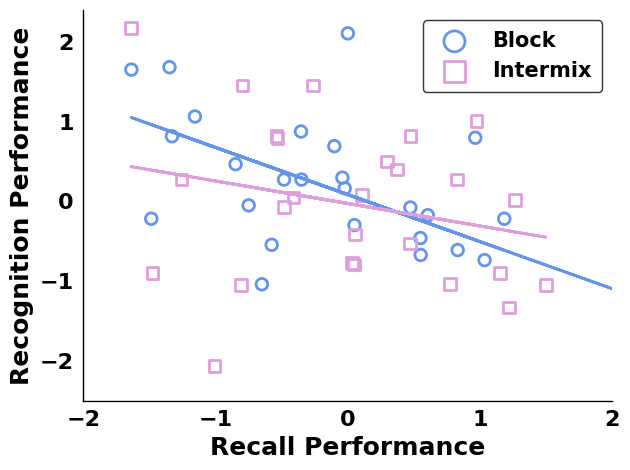

R-squared for blocked data: 0.35491968938252705
R-squared for intermixed data: 0.06152093075418541


In [ ]:
# scatter plot for z-scored recall vs. recog

legendFont = {'family':'sans-serif','size':15,'weight':'bold'}


all_n = n_mTBI + n_contr;

allData = pd.read_excel("lena_nura_24_wpd_long.xlsx", nrows=all_n * 4)

# Extracting data for blocked recall and blocked recognition Z-scores
blocked_recall_zscores = allData[(allData['Task'] == 'Recall') & (allData['TrialType'] == 'Blocked')]['Zscore']
blocked_recognition_zscores = allData[(allData['Task'] == 'Recognition') & (allData['TrialType'] == 'Blocked')]['Zscore']

intermixed_recall_zscores = allData[(allData['Task'] == 'Recall') & (allData['TrialType'] == 'Intermixed')]['Zscore']
intermixed_recognition_zscores = allData[(allData['Task'] == 'Recognition') & (allData['TrialType'] == 'Intermixed')]['Zscore']

plt.scatter(blocked_recall_zscores,blocked_recognition_zscores, s=70, facecolors='none', edgecolors='cornflowerblue', label="Block",linewidths=2)
plt.scatter(intermixed_recall_zscores,intermixed_recognition_zscores, s=70, marker='s',facecolors='none', edgecolors='plum', label = "Intermix",linewidths=2)

plt.xlabel('Recall Performance', fontdict=labelFont,fontweight='bold')
plt.ylabel('Recognition Performance', fontdict=labelFont,fontweight='bold')
plt.xlim(-2,2)
plt.xticks(np.arange(-2, 2.1, 1))
# plt.yticks(np.arange(0, 81, 20))

ax = plt.subplot()

# z = np.polyfit(blocked_recall_zscores,blocked_recognition_zscores, 1)
# p = np.poly1d(z)
# plt.plot(blocked_recall_zscores,p(blocked_recognition_zscores), color = "cornflowerblue",linewidth=2)

# z2 = np.polyfit(intermixed_recall_zscores,intermixed_recognition_zscores, 1)
# p2 = np.poly1d(z2)
# plt.plot(intermixed_recall_zscores,p2(intermixed_recognition_zscores), color = "plum",linewidth=2)

# Fit linear regression models for blocked and intermixed data
model_blocked = LinearRegression().fit(blocked_recall_zscores.values.reshape(-1, 1), blocked_recognition_zscores)
model_intermixed = LinearRegression().fit(intermixed_recall_zscores.values.reshape(-1, 1), intermixed_recognition_zscores)

# Plotting lines of best fit
plt.plot(blocked_recall_zscores, model_blocked.predict(blocked_recall_zscores.values.reshape(-1, 1)), color="cornflowerblue", linewidth=2)
plt.plot(intermixed_recall_zscores, model_intermixed.predict(intermixed_recall_zscores.values.reshape(-1, 1)), color="plum", linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(bottom = False,labelsize=16)
plt.tick_params(left = False,labelsize=16)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

# plt.tight_layout()
plt.tight_layout()
plt.savefig("z_recog_recall.png",format="png",dpi=600)
plt.show()

# Calculate R-squared for blocked data
r_squared_blocked = r2_score(blocked_recognition_zscores, model_blocked.predict(blocked_recall_zscores.values.reshape(-1, 1)))

# Calculate R-squared for intermixed data
r_squared_intermixed = r2_score(intermixed_recognition_zscores, model_intermixed.predict(intermixed_recall_zscores.values.reshape(-1, 1)))

print("R-squared for blocked data:", r_squared_blocked)
print("R-squared for intermixed data:", r_squared_intermixed)

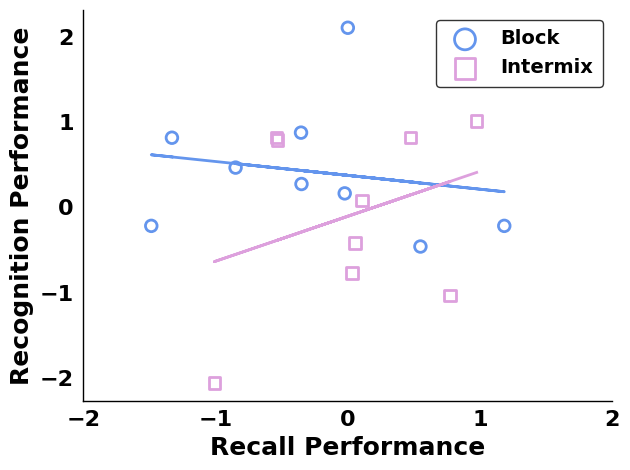

R-squared for mTBI (Blocked): 0.03165153983396041
R-squared for mTBI (Intermixed): 0.10393946263721965


In [ ]:

legendFont = {'family':'sans-serif','size':14,'weight':'bold'}

# Read data from Excel file
allData = pd.read_excel("lena_nura_24_wpd_long.xlsx", nrows=all_n * 4)

# Extract data for mTBI and Control groups
mTBI_data = allData[allData['Group'] == 'mTBI']
# control_data = allData[allData['Group'] == 'Control']

# Extracting data for blocked and intermixed trials for mTBI
mTBI_blocked_data = mTBI_data[mTBI_data['TrialType'] == 'Blocked']
mTBI_intermixed_data = mTBI_data[mTBI_data['TrialType'] == 'Intermixed']

# # Extracting data for blocked and intermixed trials for Control
# control_blocked_data = control_data[control_data['TrialType'] == 'Blocked']
# control_intermixed_data = control_data[control_data['TrialType'] == 'Intermixed']

# Extracting data for blocked recall and blocked recognition Z-scores for mTBI
mTBI_blocked_recall_zscores = mTBI_blocked_data[mTBI_blocked_data['Task'] == 'Recall']['Zscore']
mTBI_blocked_recognition_zscores = mTBI_blocked_data[mTBI_blocked_data['Task'] == 'Recognition']['Zscore']

# Extracting data for intermixed recall and intermixed recognition Z-scores for mTBI
mTBI_intermixed_recall_zscores = mTBI_intermixed_data[mTBI_intermixed_data['Task'] == 'Recall']['Zscore']
mTBI_intermixed_recognition_zscores = mTBI_intermixed_data[mTBI_intermixed_data['Task'] == 'Recognition']['Zscore']

# # Extracting data for blocked recall and blocked recognition Z-scores for Control
# control_blocked_recall_zscores = control_blocked_data[control_blocked_data['Task'] == 'Recall']['Zscore']
# control_blocked_recognition_zscores = control_blocked_data[control_blocked_data['Task'] == 'Recognition']['Zscore']

# # Extracting data for intermixed recall and intermixed recognition Z-scores for Control
# control_intermixed_recall_zscores = control_intermixed_data[control_intermixed_data['Task'] == 'Recall']['Zscore']
# control_intermixed_recognition_zscores = control_intermixed_data[control_intermixed_data['Task'] == 'Recognition']['Zscore']

# # Plotting the scatter plots
# plt.figure(figsize=(10, 8))

# Plotting for mTBI
plt.scatter(mTBI_blocked_recall_zscores, mTBI_blocked_recognition_zscores, s=70, facecolors='none', edgecolors='cornflowerblue', label='Block', linewidths=2)
plt.scatter(mTBI_intermixed_recall_zscores, mTBI_intermixed_recognition_zscores, s=70, marker='s', facecolors='none', edgecolors='plum', label='Intermix', linewidths=2)

# Plotting lines of best fit for mTBI
model_mTBI_blocked = LinearRegression().fit(mTBI_blocked_recall_zscores.values.reshape(-1, 1), mTBI_blocked_recognition_zscores)
model_mTBI_intermixed = LinearRegression().fit(mTBI_intermixed_recall_zscores.values.reshape(-1, 1), mTBI_intermixed_recognition_zscores)
plt.plot(mTBI_blocked_recall_zscores, model_mTBI_blocked.predict(mTBI_blocked_recall_zscores.values.reshape(-1, 1)), color="cornflowerblue", linewidth=2)
plt.plot(mTBI_intermixed_recall_zscores, model_mTBI_intermixed.predict(mTBI_intermixed_recall_zscores.values.reshape(-1, 1)), color="plum", linewidth=2)

# # Plotting for Control
# plt.scatter(control_blocked_recall_zscores, control_blocked_recognition_zscores, s=70, facecolors='none', edgecolors='darkorange', label="Control (Blocked)", linewidths=2)
# plt.scatter(control_intermixed_recall_zscores, control_intermixed_recognition_zscores, s=70, marker='s', facecolors='none', edgecolors='crimson', label="Control (Intermixed)", linewidths=2)

# # Plotting lines of best fit for Control
# model_control_blocked = LinearRegression().fit(control_blocked_recall_zscores.values.reshape(-1, 1), control_blocked_recognition_zscores)
# model_control_intermixed = LinearRegression().fit(control_intermixed_recall_zscores.values.reshape(-1, 1), control_intermixed_recognition_zscores)
# plt.plot(control_blocked_recall_zscores, model_control_blocked.predict(control_blocked_recall_zscores.values.reshape(-1, 1)), color="darkorange", linewidth=2)
# plt.plot(control_intermixed_recall_zscores, model_control_intermixed.predict(control_intermixed_recall_zscores.values.reshape(-1, 1)), color="crimson", linewidth=2)

ax = plt.subplot()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(bottom = False,labelsize=16)
plt.tick_params(left = False,labelsize=16)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.xlim(-2,2)
plt.xticks(np.arange(-2, 2.1, 1))

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.xlabel('Recall Performance', fontdict=labelFont,fontweight='bold')
plt.ylabel('Recognition Performance', fontdict=labelFont,fontweight='bold')

# Adding grid and saving the plot
plt.tight_layout()
plt.savefig("z_recog_recall3.png",format="png",dpi=600)
plt.show()

# Calculate R-squared for mTBI
r_squared_mTBI_blocked = r2_score(mTBI_blocked_recognition_zscores, model_mTBI_blocked.predict(mTBI_blocked_recall_zscores.values.reshape(-1, 1)))
r_squared_mTBI_intermixed = r2_score(mTBI_intermixed_recognition_zscores, model_mTBI_intermixed.predict(mTBI_intermixed_recall_zscores.values.reshape(-1, 1)))
print("R-squared for mTBI (Blocked):", r_squared_mTBI_blocked)
print("R-squared for mTBI (Intermixed):", r_squared_mTBI_intermixed)

# # Calculate R-squared for Control
# r_squared_control_blocked = r2_score(control_blocked_recognition_zscores, model_control_blocked.predict(control_blocked_recall_zscores.values.reshape(-1, 1)))
# r_squared_control_intermixed = r2_score(control_intermixed_recognition_zscores, model_control_intermixed.predict(control_intermixed_recall_zscores.values.reshape(-1, 1)))
# print("R-squared for Control (Blocked):", r_squared_control_blocked)
# print("R-squared for Control (Intermixed):", r_squared_control_intermixed)


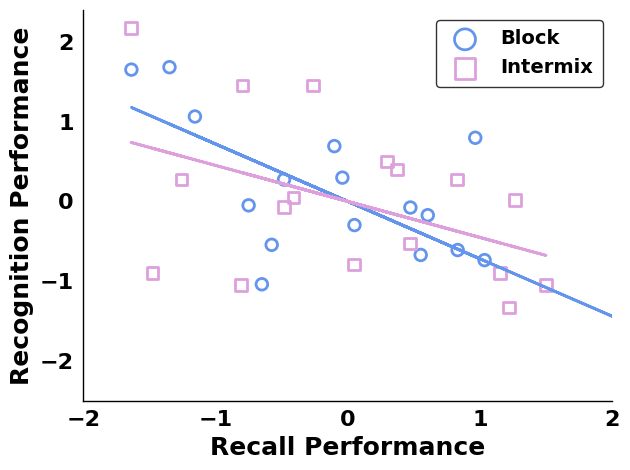

R-squared for Control (Blocked): 0.5174834307704046
R-squared for Control (Intermixed): 0.20366861792924018


In [ ]:

legendFont = {'family':'sans-serif','size':14,'weight':'bold'}

# Read data from Excel file
allData = pd.read_excel("lena_nura_24_wpd_long.xlsx", nrows=all_n * 4)

# Extract data for mTBI and Control groups
# mTBI_data = allData[allData['Group'] == 'mTBI']
control_data = allData[allData['Group'] == 'Control']

# # Extracting data for blocked and intermixed trials for mTBI
# mTBI_blocked_data = mTBI_data[mTBI_data['TrialType'] == 'Blocked']
# mTBI_intermixed_data = mTBI_data[mTBI_data['TrialType'] == 'Intermixed']

# Extracting data for blocked and intermixed trials for Control
control_blocked_data = control_data[control_data['TrialType'] == 'Blocked']
control_intermixed_data = control_data[control_data['TrialType'] == 'Intermixed']

# # Extracting data for blocked recall and blocked recognition Z-scores for mTBI
# mTBI_blocked_recall_zscores = mTBI_blocked_data[mTBI_blocked_data['Task'] == 'Recall']['Zscore']
# mTBI_blocked_recognition_zscores = mTBI_blocked_data[mTBI_blocked_data['Task'] == 'Recognition']['Zscore']

# # Extracting data for intermixed recall and intermixed recognition Z-scores for mTBI
# mTBI_intermixed_recall_zscores = mTBI_intermixed_data[mTBI_intermixed_data['Task'] == 'Recall']['Zscore']
# mTBI_intermixed_recognition_zscores = mTBI_intermixed_data[mTBI_intermixed_data['Task'] == 'Recognition']['Zscore']

# Extracting data for blocked recall and blocked recognition Z-scores for Control
control_blocked_recall_zscores = control_blocked_data[control_blocked_data['Task'] == 'Recall']['Zscore']
control_blocked_recognition_zscores = control_blocked_data[control_blocked_data['Task'] == 'Recognition']['Zscore']

# Extracting data for intermixed recall and intermixed recognition Z-scores for Control
control_intermixed_recall_zscores = control_intermixed_data[control_intermixed_data['Task'] == 'Recall']['Zscore']
control_intermixed_recognition_zscores = control_intermixed_data[control_intermixed_data['Task'] == 'Recognition']['Zscore']

# # Plotting the scatter plots
# plt.figure(figsize=(10, 8))

# # Plotting for mTBI
# plt.scatter(mTBI_blocked_recall_zscores, mTBI_blocked_recognition_zscores, s=70, facecolors='none', edgecolors='cornflowerblue', label="mTBI (Blocked)", linewidths=2)
# plt.scatter(mTBI_intermixed_recall_zscores, mTBI_intermixed_recognition_zscores, s=70, marker='s', facecolors='none', edgecolors='plum', label="mTBI (Intermixed)", linewidths=2)

# # Plotting lines of best fit for mTBI
# model_mTBI_blocked = LinearRegression().fit(mTBI_blocked_recall_zscores.values.reshape(-1, 1), mTBI_blocked_recognition_zscores)
# model_mTBI_intermixed = LinearRegression().fit(mTBI_intermixed_recall_zscores.values.reshape(-1, 1), mTBI_intermixed_recognition_zscores)
# plt.plot(mTBI_blocked_recall_zscores, model_mTBI_blocked.predict(mTBI_blocked_recall_zscores.values.reshape(-1, 1)), color="cornflowerblue", linewidth=2)
# plt.plot(mTBI_intermixed_recall_zscores, model_mTBI_intermixed.predict(mTBI_intermixed_recall_zscores.values.reshape(-1, 1)), color="plum", linewidth=2)

# Plotting for Control
plt.scatter(control_blocked_recall_zscores, control_blocked_recognition_zscores, s=70, facecolors='none', edgecolors='cornflowerblue', linewidths=2,label='Block')
plt.scatter(control_intermixed_recall_zscores, control_intermixed_recognition_zscores, s=70, marker='s', facecolors='none', edgecolors='plum', linewidths=2,label='Intermix')

# Plotting lines of best fit for Control
model_control_blocked = LinearRegression().fit(control_blocked_recall_zscores.values.reshape(-1, 1), control_blocked_recognition_zscores)
model_control_intermixed = LinearRegression().fit(control_intermixed_recall_zscores.values.reshape(-1, 1), control_intermixed_recognition_zscores)
plt.plot(control_blocked_recall_zscores, model_control_blocked.predict(control_blocked_recall_zscores.values.reshape(-1, 1)), color="cornflowerblue", linewidth=2)
plt.plot(control_intermixed_recall_zscores, model_control_intermixed.predict(control_intermixed_recall_zscores.values.reshape(-1, 1)), color="plum", linewidth=2)

ax = plt.subplot()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(bottom = False,labelsize=16)
plt.tick_params(left = False,labelsize=16)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.xlim(-2,2)
plt.xticks(np.arange(-2, 2.1, 1))

legend=plt.legend(prop=legendFont, borderpad=0.5, markerscale=1.8)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)

plt.xlabel('Recall Performance', fontdict=labelFont,fontweight='bold')
plt.ylabel('Recognition Performance', fontdict=labelFont,fontweight='bold')

# Adding grid and saving the plot
plt.tight_layout()
plt.savefig("z_recog_recall4.png",format="png",dpi=600)
plt.show()

# # Calculate R-squared for mTBI
# r_squared_mTBI_blocked = r2_score(mTBI_blocked_recognition_zscores, model_mTBI_blocked.predict(mTBI_blocked_recall_zscores.values.reshape(-1, 1)))
# r_squared_mTBI_intermixed = r2_score(mTBI_intermixed_recognition_zscores, model_mTBI_intermixed.predict(mTBI_intermixed_recall_zscores.values.reshape(-1, 1)))
# print("R-squared for mTBI (Blocked):", r_squared_mTBI_blocked)
# print("R-squared for mTBI (Intermixed):", r_squared_mTBI_intermixed)

# Calculate R-squared for Control
r_squared_control_blocked = r2_score(control_blocked_recognition_zscores, model_control_blocked.predict(control_blocked_recall_zscores.values.reshape(-1, 1)))
r_squared_control_intermixed = r2_score(control_intermixed_recognition_zscores, model_control_intermixed.predict(control_intermixed_recall_zscores.values.reshape(-1, 1)))
print("R-squared for Control (Blocked):", r_squared_control_blocked)
print("R-squared for Control (Intermixed):", r_squared_control_intermixed)
